#### **Universidade Cruzeiro do Sul**
#### Aluno: Carlos Antonio Sales de Souza / RGM: 24120758
#### Disciplina: Visualização da Informação / Turma : 03_052021

<hr/>

# Visualização da Informação - Projeto da disciplina

 O projeto da disciplina consiste em apresentar uma implementação, em Python, da visualização de informações presentes em um dataset usando ao menos três técnicas estudadas na disciplina.

## Requisitos

* O dataset deve trazer dados Reais
* As visualizações devem ser adequadas à natureza dos dados e todas devem ser relacionadas entre si, já que se referem a partes do mesmo dataset.

<hr>

## Dados utilizados

Os dados utilizados neste projeto tratam-se de uma lista contendo as 10 maiores fortunas mundiais no período de 2018 a 2020. Os mesmos foram produzidos pela revistas Forbes e obtidos no site Wikipedia no endereço: https://pt.wikipedia.org/wiki/Listas_de_bilion%C3%A1rios

## Importação de bibliotecas e leitura de dados

In [1]:
import pandas as pd  # Biblioteca Pandas responsável pela manipulação e análise de dados
import matplotlib.pyplot as plt # Biblioteca Matplotlib responsável pela exibição dos gráficos
import numpy as np # Bliblioteca Numpy utilizada na operação com Arrays Multidimensionais

In [12]:
df = pd.read_csv("bilionarios.csv")  # Leitura do arquivo CSV 

In [13]:
df.head()  # Visualização dos 5 primeiros registros contidos no dataframe

,ano,nome,fortuna,Idade,pais,origem
0,2020,Jeff Bezos,113.0,56,EUA,Amazon.com
1,2020,Bill Gates,98.0,64,EUA,Cascade Investment: Microsoft
2,2020,Bernard Arnault & familia,76.0,71,Franca,LVMH
3,2020,Warren Buffett,67.5,89,EUA,Berkshire Hathaway
4,2020,Larry Ellison,59.0,75,EUA,Oracle Corporation


In [4]:
df.info() # Informações do dataframe contendo o nome das colunas, seus respectivos tipos de dados e a quantidade de linhas/registros com valores não nulos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ano      30 non-null     int64  
 1   nome     30 non-null     object 
 2   fortuna  30 non-null     float64
 3   Idade    30 non-null     int64  
 4   pais     30 non-null     object 
 5   origem   30 non-null     object 
dtypes: float64(1), int64(2), object(3)
memory usage: 1.5+ KB


In [5]:
df.describe()  # Descrição do dataframe contendo seu valor médio (mean), mínimo (min), máximo (max), desvio padrão (std) e quartis (25%, 50% e 75%).

,ano,fortuna,Idade
count,30.000000,30.000000,30.000000
mean,2019.000000,72.493333,68.600000
std,0.830455,20.260424,15.806153
min,2018.000000,50.800000,33.000000
25%,2018.000000,58.625000,62.250000
50%,2019.000000,65.550000,72.500000
75%,2020.000000,80.875000,78.750000
max,2020.000000,131.000000,89.000000


## 1º VISUALIZAÇÃO - Estatística Descritiva

A Estatística Descritiva básica se preocupa em sintetizar os dados da maneira mais direta possível. Para isso, ela lança mão de diversos gráficos como gráfico de barras e de setores. 

Neste exemplo iremos observar as 10 maiores fortunas mundiais totalizadas por País no período de 2018 a 2020.


In [6]:
df2  = df.groupby(by='pais')['fortuna'].sum()
df2

pais
EUA        1631.9
Espanha     187.8
Franca      224.0
Mexico      131.1
Name: fortuna, dtype: float64

### **Gráfico de Barras** - Utilizado para mostrar a relação entre uma variável categórica e uma variável numérica. 

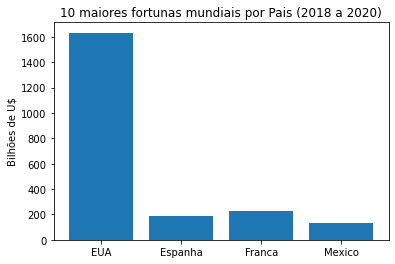

In [7]:
paises = ('EUA', 'Espanha', 'Franca', 'Mexico')
indice = np.arange(len(paises))
fortuna = df.groupby(by='pais')['fortuna'].sum()
plt.xticks(indice, paises)
plt.ylabel('Bilhões de U$')
plt.title('10 maiores fortunas mundiais por Pais (2018 a 2020)')
plt.bar(indice, fortuna)
plt.show()

### **Gráfico de Setores** - Indicado para para comparar poucos valores que compõem um todo.

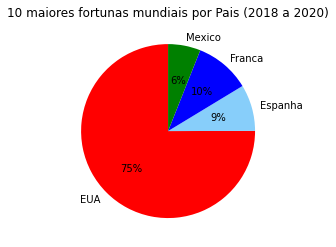

In [17]:
labels = ('EUA', 'Espanha', 'Franca', 'Mexico')
sizes = df.groupby(by='pais')['fortuna'].sum()
colors = ['red', 'lightskyblue', 'blue', 'green']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.0f%%', startangle=90)
plt.title('10 maiores fortunas mundiais por Pais (2018 a 2020)')
plt.show()


## 2º VISUALIZAÇÃO - Informação Temporal

Consideramos dado temporal todo aquele dado que é alterado com o passar do tempo, ou sobre o qual os aspectos temporais exerçam algum tipo de
influência. Neste caso observamos a evolução anual das 10 maiores fortunas mundiais no período de 2018 a 2020. 

In [9]:
df3  = df.groupby(by='ano')['fortuna'].sum()
df3

ano
2018    744.6
2019    743.8
2020    686.4
Name: fortuna, dtype: float64

### **Gráfico de Linhas** - Indicado para para comparar poucos valores que compõem um todo.

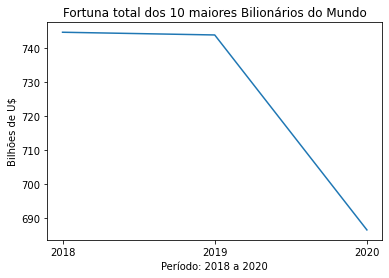

In [10]:
anos = ('2018', '2019', '2020')
fortuna = df.groupby(by='ano')['fortuna'].sum()
plt.plot(anos,fortuna)
plt.title('Fortuna total dos 10 maiores Bilionários do Mundo')
plt.xlabel('Período: 2018 a 2020')
plt.ylabel('Bilhões de U$')
plt.show()

## 3º VISUALIZAÇÃO - Geográfica

Um Choropleth é um tipo de mapa em que as áreas são preenchidas com cores ou padrões proporcionais às quantidades relacionadas a cada área.